In [20]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
from scipy.stats import norm

In [19]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


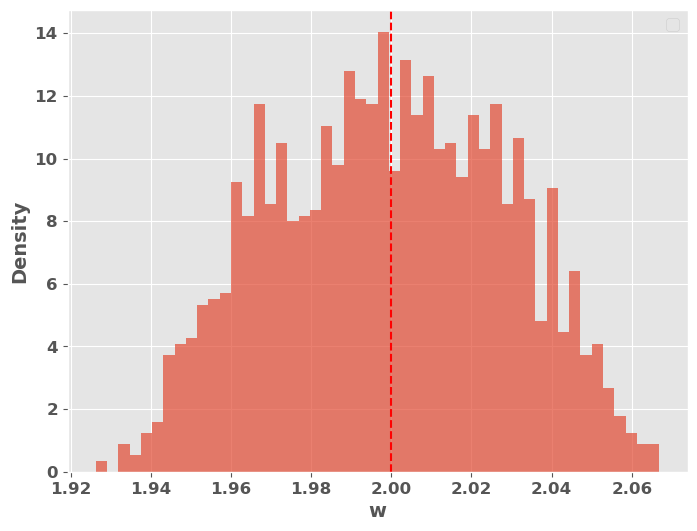

In [21]:
# Generate synthetic data
def generate_data(n_samples=1000):
    x = np.random.normal(0, 1, n_samples)
    y = np.random.normal(0, 1, n_samples)
    return x, y

# Set up the problem
n_samples = 10000
w0 = 2
d1 = 2
d2 = 4 
wmax = 2*w0
# Generate synthetic data
x, y = generate_data(n_samples=n_samples)

# Define the model using PyMC3
with pm.Model() as model:
    # Prior distribution for w
    w = pm.Uniform('w', lower=-wmax, upper=wmax)
    
    # Likelihood function
    likelihood = pm.Normal('likelihood', mu=(w + w0)**d1 * (w - w0)**d2 * x, sigma=0.1, observed=y)
    
    # Perform MCMC sampling
    trace = pm.sample(1000, tune=1000, cores=1, random_seed=42)

# Extract the sampled values of w

w_samples = trace.posterior['w'].values.flatten()

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(w_samples, bins=50, density=True, alpha=0.7)
ax.axvline(w0, color='r', linestyle='--', label='Most singular')
ax.set_xlabel('w')
ax.set_xlim((-wmax,wmax))
ax.set_ylabel('Density')
ax.legend()
plt.show()